Описание данных:

survival	Survival
pclass	Ticket class
sex	Sex
Age	Age in years
sibsp	# of siblings / spouses aboard the Titanic
parch	# of parents / children aboard the Titanic
ticket	Ticket number
fare	Passenger fare
cabin	Cabin number
embarked	Port of Embarkation


In [1]:
import pandas as pd
from pandas.api.types import is_numeric_dtype

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

def fill_nan_custom(*, data, str_val='Неизвестно', bool_val=False, num_median=True, num_mean=False):
    """
    При использовании этой фунции необходимо указывать название аргументов.
    Функция сыровата, но работает, не стал уделять ей слишком много времени на данном этапе, в будущем буду ее дорабатывать.
    
    data - датафрейм который необходимо заполнить.
    str_val - значение которое нужно вставить для типа данных object. ("Неизвестно" по умолчанию)
    bool_val - значение которое нужно вставить для типа данных bool. (False по умолчанию)
    num_median - заполнить цифровые значения(int, float) медианой. (True по умолчанию)
    num_mean - заполнить цифровые значения(int, float) средним числом. (False по умолчанию)
    """
    temp_data = data.copy() # Создаем копию датафрейма, который затем будем изменять.

    # Проверка заполненности аргументов функции.
    if (not num_median) and (not num_mean):
        print('At least one of the arguments must be assigned as True.')
        return 0
        
    elif num_median and num_mean:
        print('Both num_median and num_mean can not be assigned as True at the same time.')
        return 0
        
    # Проходим по каждой колонне и производим заполнение
    total_rows = len(data) # Максимально возможное кол-во рядов в колоннах.
    for column_name in temp_data:
        current_column_rows = temp_data[column_name].count() # Кол-во рядов в текущей колонне.
        if current_column_rows != total_rows:
            setter = '' # Переменная которая используется для вставки значения вместо NaN
            data_type = temp_data[column_name].dtype # Узнаем тип данных колонны
            # print(f'{column_name} - {data_type}')
            # Присваиваем значения переменной setter в зависимости от типа данных
            if is_numeric_dtype(temp_data[column_name]) and num_median:
                setter = temp_data[column_name].median()
            elif is_numeric_dtype(temp_data[column_name]) and num_mean:
                setter = temp_data[column_name].mean()
            else:
                setter = str_val if data_type == 'object' else bool_val
            temp_data[column_name] = temp_data[column_name].fillna(setter) # Итоговое изменение колонны
        #     print(f'{column_name.upper()} before: {current_column_rows}\n{column_name.upper()} NOW: {temp_data[column_name].count()}\n')
        # else:
        #     print(f'{column_name.upper()} is already full.\n')
    return temp_data # функция возвращает копию датасета, не меняя оригинальный.

In [2]:
df_raw = pd.read_csv('../datasets/titanic.csv', sep=',')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   sex          891 non-null    object 
 4   age          714 non-null    float64
 5   sibsp        891 non-null    int64  
 6   parch        891 non-null    int64  
 7   fare         891 non-null    float64
 8   embarked     889 non-null    object 
 9   class        891 non-null    object 
 10  who          891 non-null    object 
 11  adult_male   891 non-null    bool   
 12  deck         203 non-null    object 
 13  embark_town  889 non-null    object 
 14  alive        891 non-null    object 
 15  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(7)
memory usage: 99.3+ KB


In [3]:
df_raw = df_raw.drop_duplicates()

In [4]:
# заполняю пропущенные значения
df = fill_nan_custom(data=df_raw, str_val='unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   sex          891 non-null    object 
 4   age          891 non-null    float64
 5   sibsp        891 non-null    int64  
 6   parch        891 non-null    int64  
 7   fare         891 non-null    float64
 8   embarked     891 non-null    object 
 9   class        891 non-null    object 
 10  who          891 non-null    object 
 11  adult_male   891 non-null    bool   
 12  deck         891 non-null    object 
 13  embark_town  891 non-null    object 
 14  alive        891 non-null    object 
 15  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(7)
memory usage: 99.3+ KB


In [5]:
df

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,unknown,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,unknown,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,unknown,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,unknown,Southampton,no,True
887,887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,unknown,Southampton,no,False
889,889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: xlabel='sex', ylabel='age'>

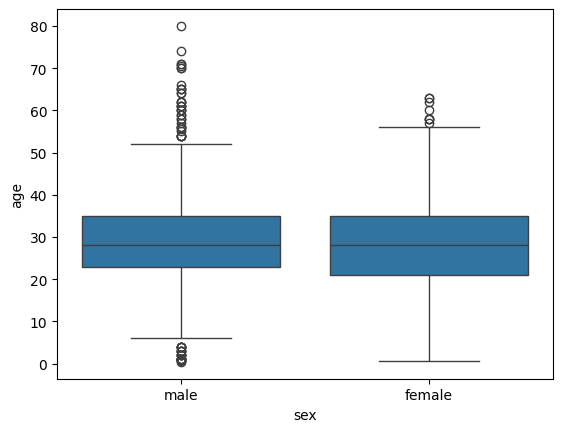

In [19]:
sns.boxplot(df[['age', 'sex']], x='sex', y='age')
# тут мы видим какого возраста пассажиры титаника.
# возраст мужчин в основном, примерно, от 24 до 35
# возраст женщин в основном, примерно, от 22 до 35

<Axes: >

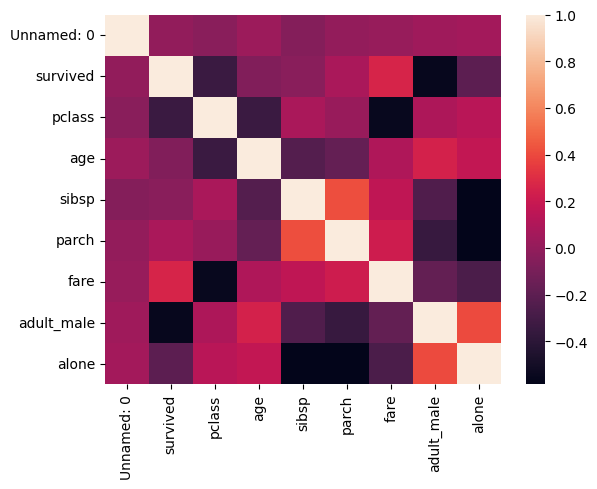

In [22]:
hmap_data = df.corr(numeric_only=True)
sns.heatmap(hmap_data)

# интересно наблюдать то что выживаемость, в большей степени связана с платой за рейс и с меньшей связана с классом пассажира.
# но при этом плата никак не зависит от класса

# 1. Посчитайте средний возраст пассажиров сгруппированных по классам.

In [8]:
df.groupby('class').agg({'age': lambda x: round(x.mean())}).sort_values(by='age', ascending=False).reset_index()

,class,age
0,First,37
1,Second,30
2,Third,26


# 2. Выявите какого возраста пассажиры выжили больше всего

In [9]:
# .value_counts() - counts the amount of unique values in the column
# .idxmax() - returns the index with the max value. In our case the value we need is the index.

survived_passengers = df[df['survived'] == 1]
most_common_age_survived = survived_passengers['age'].value_counts().idxmax()
print("Самый часто встречающийся возраст выживших:", round(most_common_age_survived))

Самый часто встречающийся возраст выживших: 28


# 3. Выявите какие возраста в основном были рассредоточены по классам, а также среднюю плату за билеты среди них

In [68]:
# задача немного непонятна, поэтому сделаю так как понял

# df.groupby('pclass').agg({'age': lambda x: x}).reset_index()
test = df[['class', 'age']].sort_values(by='class')

ages_per_class = test.groupby('class').agg({'age': lambda x: sorted(set(x.to_list()))}).reset_index()

# тут я найду возраста которые встречались во всех 3 классах
common_ages = set(ages_per_class.loc[0, 'age']) & set(ages_per_class.loc[1, 'age']) & set(ages_per_class.loc[2, 'age'])

print(f"Возраста встречающиеся во всех классах: {list(common_ages)}")

Возраста встречающиеся во всех классах: [2.0, 4.0, 14.0, 16.0, 17.0, 18.0, 19.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 47.0, 48.0, 50.0, 51.0]


In [69]:
# Group by class and aggregate unique age values
ages_per_class = df.groupby('class')['age'].apply(lambda x: sorted(set(x))).reset_index()

# Merge the age lists for all classes
merged_ages = ages_per_class['age'].tolist()

# Find the common ages among all classes
common_ages = set(merged_ages[0]).intersection(*merged_ages[1:])

print("Common ages:", list(common_ages))

Common ages: [2.0, 4.0, 14.0, 16.0, 17.0, 18.0, 19.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 47.0, 48.0, 50.0, 51.0]


In [48]:
df[['class', 'age']].sort_values(by=['class', 'age']).value_counts().reset_index().sort_values(by=['count', 'age'], ascending=False)

,class,age,count
0,Third,28.00,148
1,First,28.00,34
3,Second,28.00,20
2,Third,22.00,20
4,Third,21.00,17
...,...,...,...
160,First,4.00,1
173,First,2.00,1
140,First,0.92,1
147,Second,0.67,1


In [12]:
# Предположим, что ваш DataFrame называется 'df'
# Выполните группировку и агрегацию для подсчета количества записей по комбинации класса и возраста
age_counts = df.groupby(['class', 'age']).size().reset_index(name='counts')
age_counts

# # Вычислите среднюю плату за билеты для каждой комбинации класса и возраста
# average_fare = df.groupby(['class', 'age'])['fare'].mean().reset_index(name='average_fare')

# # Объедините результаты
# result = pd.merge(age_counts, average_fare, on=['class', 'age'])

# # Найдите комбинации класса и возраста с наибольшим количеством записей
# max_counts = result.groupby('class')['counts'].idxmax()
# most_frequent_ages = result.loc[max_counts]

# print("Наиболее часто встречающиеся возрасты по классам:")
# print(most_frequent_ages)

,class,age,counts
0,First,0.92,1
1,First,2.00,1
2,First,4.00,1
3,First,11.00,1
4,First,14.00,1
...,...,...,...
177,Third,61.00,1
178,Third,63.00,1
179,Third,65.00,1
180,Third,70.50,1


# 4. Выявите в каком порту было больше всего пассажиров до 40 лет

In [13]:
df[df['age'] < 40].groupby('embarked').agg({'age': 'count'}).sort_values(by='age', ascending=False).reset_index()

,embarked,age
0,S,523
1,C,133
2,Q,71
3,unknown,1


# 5. Выявите самый популярный класс для пассажиров женского пола и среднюю цену поездки по ним

In [14]:
df[df['sex'] == 'female'].groupby('class')\
                         .agg({'sex': 'count', 'fare': lambda x: round(x.mean(), 2)})\
                         .sort_values(by='sex', ascending=False)\
                         .reset_index()

# самый популярный класс среди женщин - третий класс
# средняя цена за поезжку - 16,12

,class,sex,fare
0,Third,144,16.12
1,First,94,106.13
2,Second,76,21.97


# 6. Разделив пассажиров по полам, выявите какие пассажиры имеют большую сумму платы за поездку.

In [15]:
# male
df[df['sex'] == 'male'].sort_values(by='fare', ascending=False).reset_index()

,index,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,679,679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
1,737,737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
2,27,27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
3,438,438,0,1,male,64.0,1,4,263.0000,S,First,man,True,C,Southampton,no,False
4,118,118,0,1,male,24.0,0,1,247.5208,C,First,man,True,B,Cherbourg,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,263,263,0,1,male,40.0,0,0,0.0000,S,First,man,True,B,Southampton,no,True
573,271,271,1,3,male,25.0,0,0,0.0000,S,Third,man,True,unknown,Southampton,yes,True
574,822,822,0,1,male,38.0,0,0,0.0000,S,First,man,True,unknown,Southampton,no,True
575,277,277,0,2,male,28.0,0,0,0.0000,S,Second,man,True,unknown,Southampton,no,True


In [16]:
# female
df[df['sex'] == 'female'].sort_values(by='fare', ascending=False).reset_index()

,index,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,258,258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,unknown,Cherbourg,yes,True
1,341,341,1,1,female,24.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
2,88,88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
3,742,742,1,1,female,21.0,2,2,262.3750,C,First,woman,False,B,Cherbourg,yes,False
4,311,311,1,1,female,18.0,2,2,262.3750,C,First,woman,False,B,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,367,367,1,3,female,28.0,0,0,7.2292,C,Third,woman,False,unknown,Cherbourg,yes,True
310,780,780,1,3,female,13.0,0,0,7.2292,C,Third,child,False,unknown,Cherbourg,yes,True
311,19,19,1,3,female,28.0,0,0,7.2250,C,Third,woman,False,unknown,Cherbourg,yes,True
312,875,875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,unknown,Cherbourg,yes,True


In [17]:
# как мы видим на первом месте и у мужчин и у женщин одна и та же сумма 512.3292 скорее всего она является максимальной

df['fare'].max()

512.3292

# 7. Теперь посчитайте сколько было заработано денег в целом

In [18]:
print(f"За поездку было заработано: {df['fare'].sum()}")

За поездку было заработано: 28693.9493


# 8. Предположим, что компания решила выплатить компенсацию, пострадавшим семьям. Посчитайте сколько компания должна выплатить родственникам погибших на титанике, если компания обязана выплатить 100тыс долларов за каждого погибшего человека.

# 9. Теперь соберите вашу информацию и опишите вывод проделанного исследования. А также добавьте сумму убытка, которую можно посчитать, если вычесть общую сумму заработка и расходы на компенсации родственникам.